In [1]:
import pandas as pd
import numpy as np

In [2]:
gene_rate = pd.read_hdf('ITSpatial.GeneWithSlop2kb.gene_da_rate.group_center.hdf')

In [3]:
pairwise_dmg = pd.read_msgpack('TotalPairwiseMarker.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
counts = pairwise_dmg['gene_id'].value_counts()
use_gene = counts[counts > 15].index

In [5]:
gene_rate[use_gene].T.to_csv('GroupByDMG.csv')

In [6]:
from sklearn.decomposition import PCA

In [7]:
clf = PCA(
    n_components=70,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=0)

In [8]:
pc = clf.fit_transform(gene_rate[use_gene].values)

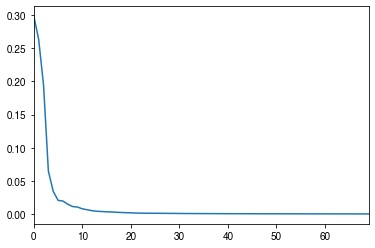

In [9]:
pd.Series(clf.explained_variance_ratio_).plot()

In [10]:
pc_df = pd.DataFrame(pc[:, :20], index=gene_rate.index, columns=[f'PC{i}' for i in range(1, 21)])
pc_df.T.to_csv('PC.csv')

## Annotate rate

In [13]:
pairwise_dmg.head()

,pvals_adj,gene_id,cluster_from,cluster_to,gene_name,-lgp,AUROC
0,1.416123e-122,ENSMUSG00000032452.12,IT-L23+ACA-1,IT-L23+ORB,Clstn2,121.848899,0.903815
1,4.504087e-120,ENSMUSG00000035566.7,IT-L23+ACA-1,IT-L23+ORB,Pcdh17,119.346393,0.899446
2,2.321487e-86,ENSMUSG00000043635.12,IT-L23+ACA-1,IT-L23+ORB,Adamts3,85.634234,0.837248
3,2.567505e-83,ENSMUSG00000115529.1,IT-L23+ACA-1,IT-L23+ORB,9630013A20Rik,82.590489,0.831117
4,2.958517e-82,ENSMUSG00000029778.12,IT-L23+ACA-1,IT-L23+ORB,Adcyap1r1,81.528926,0.828921


In [18]:
pairwise_dmg['from_rate'] = pairwise_dmg.apply(lambda i: gene_rate.at[i['cluster_from'], i['gene_id']], axis=1)

In [19]:
pairwise_dmg['to_rate'] = pairwise_dmg.apply(lambda i: gene_rate.at[i['cluster_to'], i['gene_id']], axis=1)

In [23]:
pairwise_dmg.to_msgpack('TotalPairwiseMarker.with_rate.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  """Entry point for launching an IPython kernel.


In [24]:
pairwise_dmg.shape

(1825912, 9)